# _ECE 143 Team 1 - Yelp Data Exploration and Analysis_

In [26]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import get_cuisine as gc
import plot_cuisine_count as pcc
import cuisine_count as cc
import gen_wordcloud as gwc
import contribute_time_weight as ctw
import count_data as cd
import create_bar_plots as cbp
import create_pie_chart as cpc
import create_stacked_plot as csp
import load_user_dataset as load
import create_friend_pie_chart as cfpc

In [ ]:
business = pd.read_json('./Yelp_dataset_business_clean.json', encoding='utf8')
checkin = pd.read_json('./Yelp_dataset_checkin_clean.json', encoding='utf8')
review = pd.read_json('./Yelp_dataset_review_clean.json', encoding='utf8')


# Cuisine Exploration

In [ ]:
cuisineColor = {'Indian': '#6495ED', 'Greek':'grey', 'Hawaiian': '#191970', 'French': '#f08800', 'Middle Eastern': '#8e09c8',
            'Vietnamese':'#00bd46', 'Korean': '#FF1493', 'American': '#0b37e5', 'Mexican': '#20B2AA', 'Italian': 'orange', 
           '(Non-Italian) Pizza': '#551A8B', 'Chinese': '#CD0000', 'Japanese': '#708344', 'Thai': '#00C5CD', 'Brazilian': 'teal'}

cuisines = ['Chinese', 'Italian', 'Japanese', 'Korean', 'Mexican', 'American', 'Greek', 'French', 'Spanish', 'Turkish', 'Vietnamese',
          'Russian', 'German',  'Argentine', 'Thai', 'Middle Eastern', 'Brazilian', 'Pakistani', 
          'Indian','Filipino', 'Pizza', 'Caribbean', 'Hawaiian', 'Cuban', 'Mediterranean', 'Coffee & Tea','Breakfast & Brunch', 
            'Fast Food', 'Bars']

## Trending Cuisine by # of Restaurants and # of Reviews

In [ ]:
cuisineDic = gc.get_cuisine(business)

In [ ]:
names, counts = cc.count_cuisine_num_business(cuisineDic, cuisines, True)
pcc.plot_bars(names, counts)

names, counts = cc.count_cuisine_num_business(cuisineDic, cuisines, False)
colors = list()
for n in names[0:10]:
    colors.append(cuisineColor[n])
pcc.plot_pie(names[0:10], counts[0:10], 'Top 10 Trending Cuisines on Yelp (by # of restaurants)', colors)

names, counts = cc.count_cuisine_num_review(cuisineDic, checkin, cuisines)
colors = list()
for n in names[0:10]:
    colors.append(cuisineColor[n])
pcc.plot_pie(names[0:10], counts[0:10], 'Top 10 Trending Cuisines on Yelp (by # of reviews)', colors)

## Change in Trending Cuisine Over Years
 (Expect long computation time due to the huge number of the reviews)

In [ ]:
review2 =review.drop('text', axis=1)  #Text field not used in this part

In [ ]:
years = [2013, 2019]
for y in years:
    names, counts = count_cuisine_yearly_num_review(cuisineDic, review2, cuisines, y)
    colors = list()
    for n in names[3:13]:
        colors.append(cuisineColor[n])
    pcc.plot_pie(names[3:13], counts[3:13], 
                 'Top 10 Trending Cuisines on Yelp in ' + str(y) + ' (by # of reviews)\n(Excluding American, Mexican and Italian)', 
                 colors)

# User Exploration

In [4]:
user_path = './yelp_academic_dataset_user.json'

In [8]:
avg_star = cd.count_data(user_data,'average_stars')
review_cnt = cd.count_data(user_data,'review_count')
num_friend = cd.count_data(user_data,'friends')

In [7]:
user_data = load.load_user_data(user_path,'user')

#### average ratings data visualizations

In [9]:
xaxes=['1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
title = 'distribution on the average stars users rated'
xlabel = 'Interval of the average stars users rated'
ylabel = 'count'

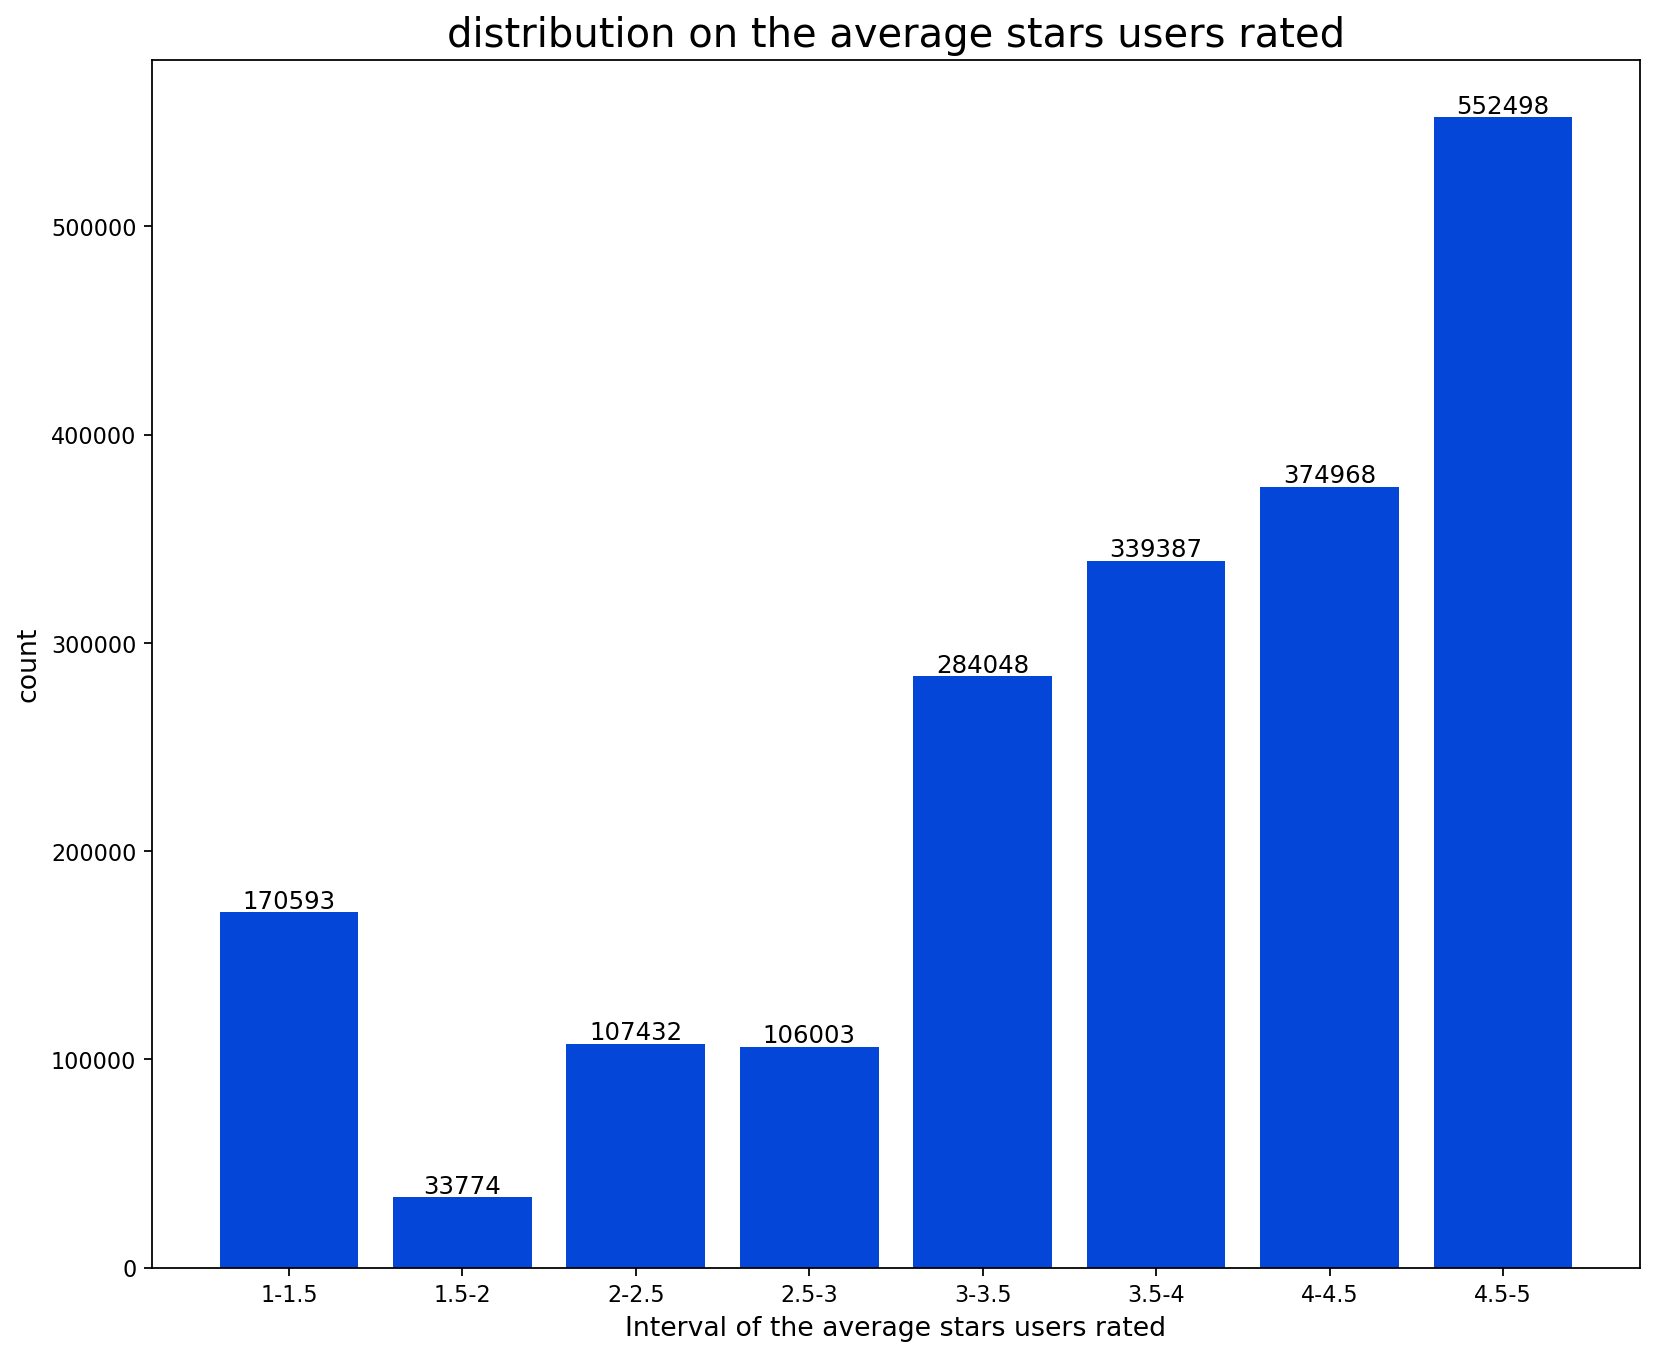

In [10]:
cbp.create_bar_plots(avg_star,xaxes,1,5,title,xlabel,ylabel)

In [11]:
title = 'percentage on the average stars users rated'

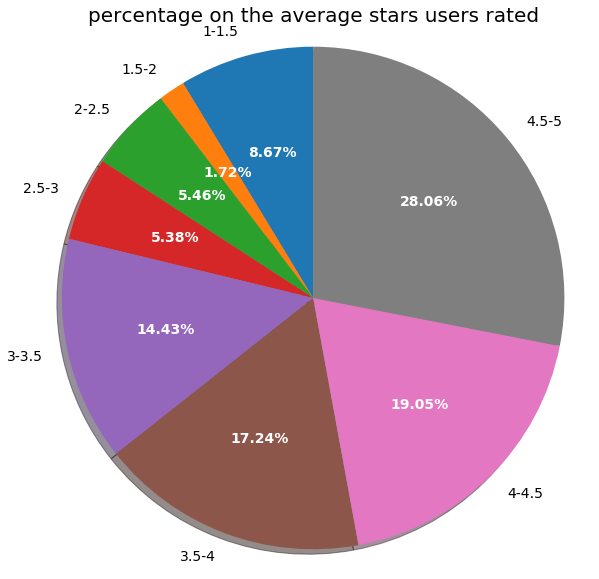

In [12]:
cpc.create_pie_chart(avg_star, xaxes,1,5,title)

#### review count data visualization

In [13]:
xaxes=['0-30','30-60','60-90','90-120','120-150','150-180','180-210','210-240','240-270','270-300']
title = 'distribution on the number of reviews users made'
xlabel = 'Interval of the number of reviews users made'
ylabel = 'count'

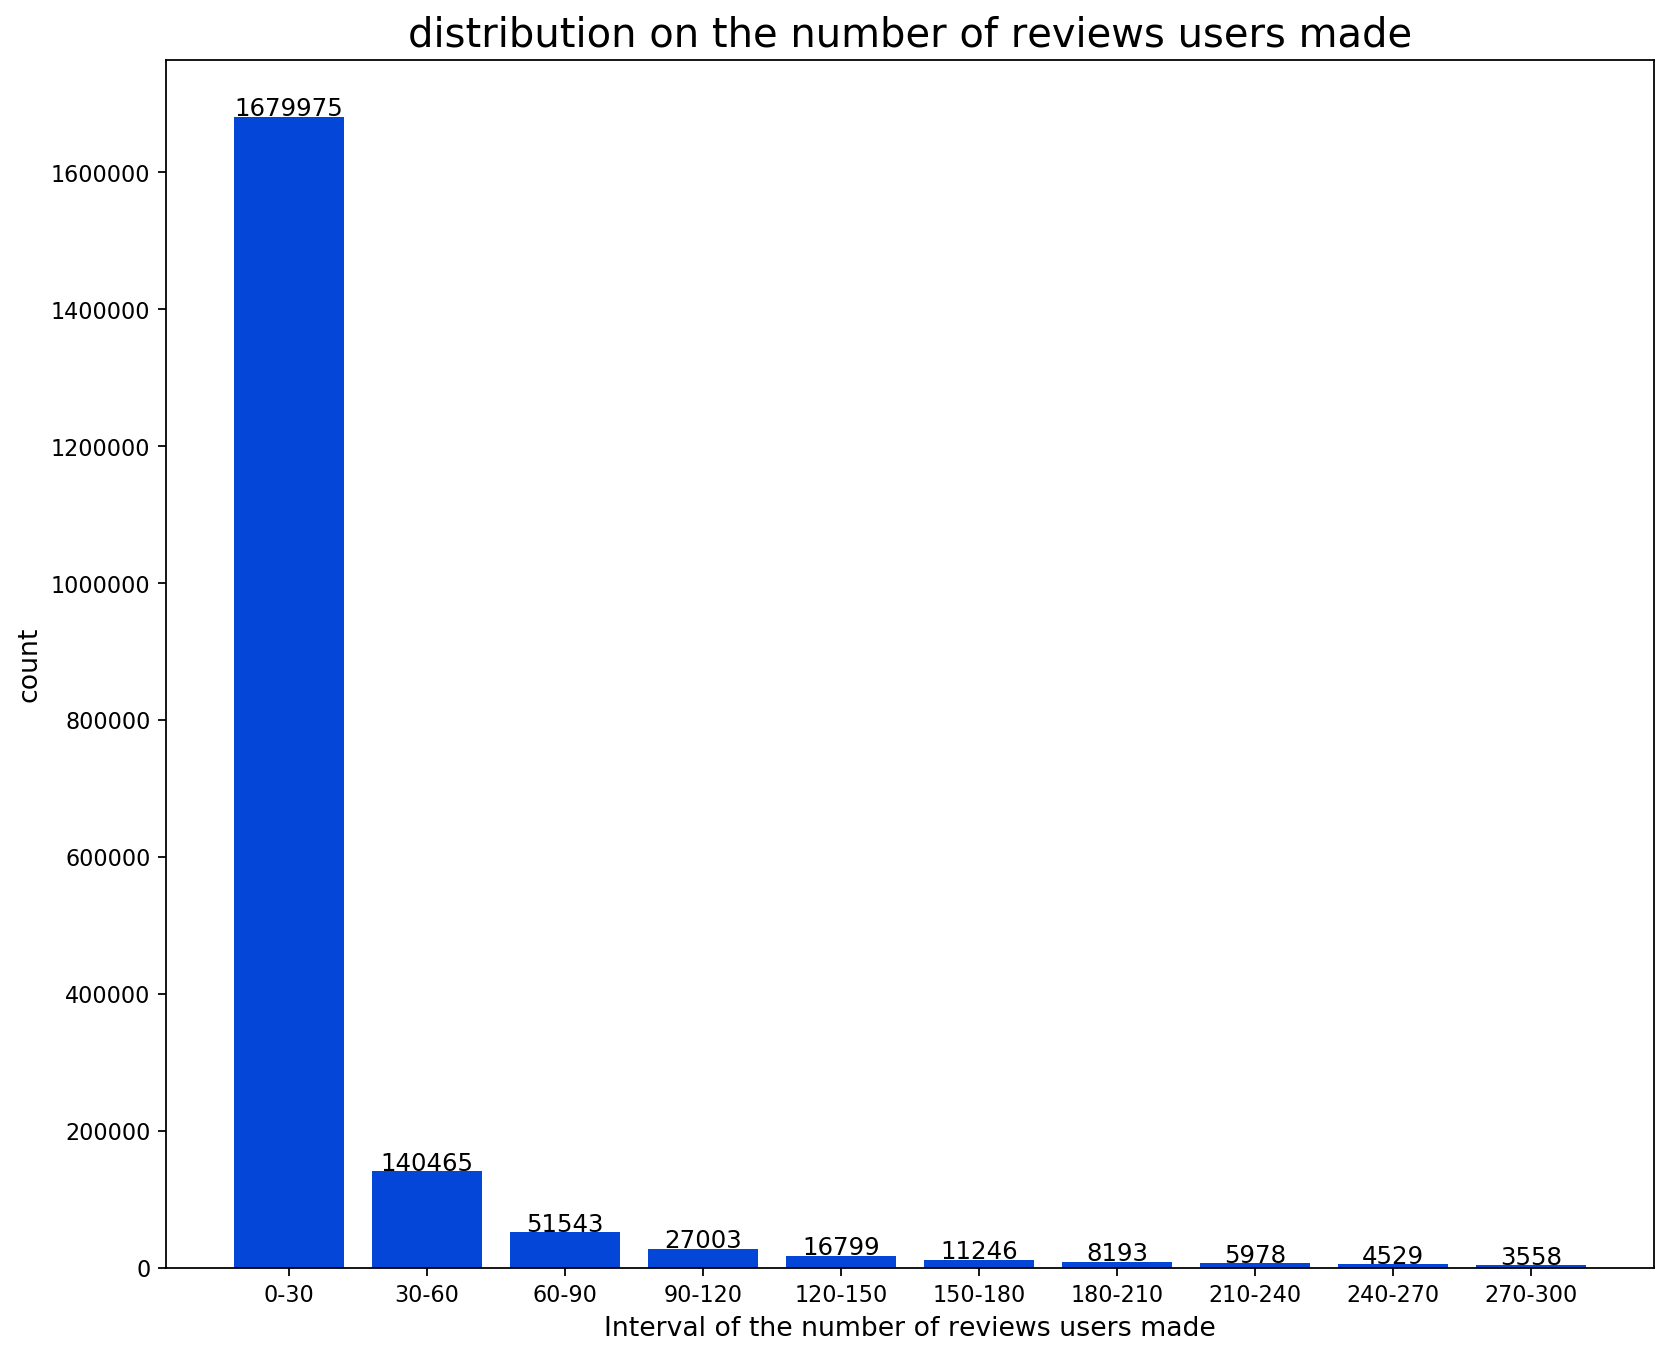

In [15]:
cbp.create_bar_plots(review_cnt,xaxes,0,300,title,xlabel,ylabel)

In [16]:
xaxes=['0-4','4-8','8-12','12-16','16-20','20-24','24-28','28-32','32-36','36-40','40-44','44-48','48-52','52-56','56-60']
title = 'distribution on the number of reviews below 60'
xlabel = 'Interval of the number of reviews users made'
ylabel = 'count'

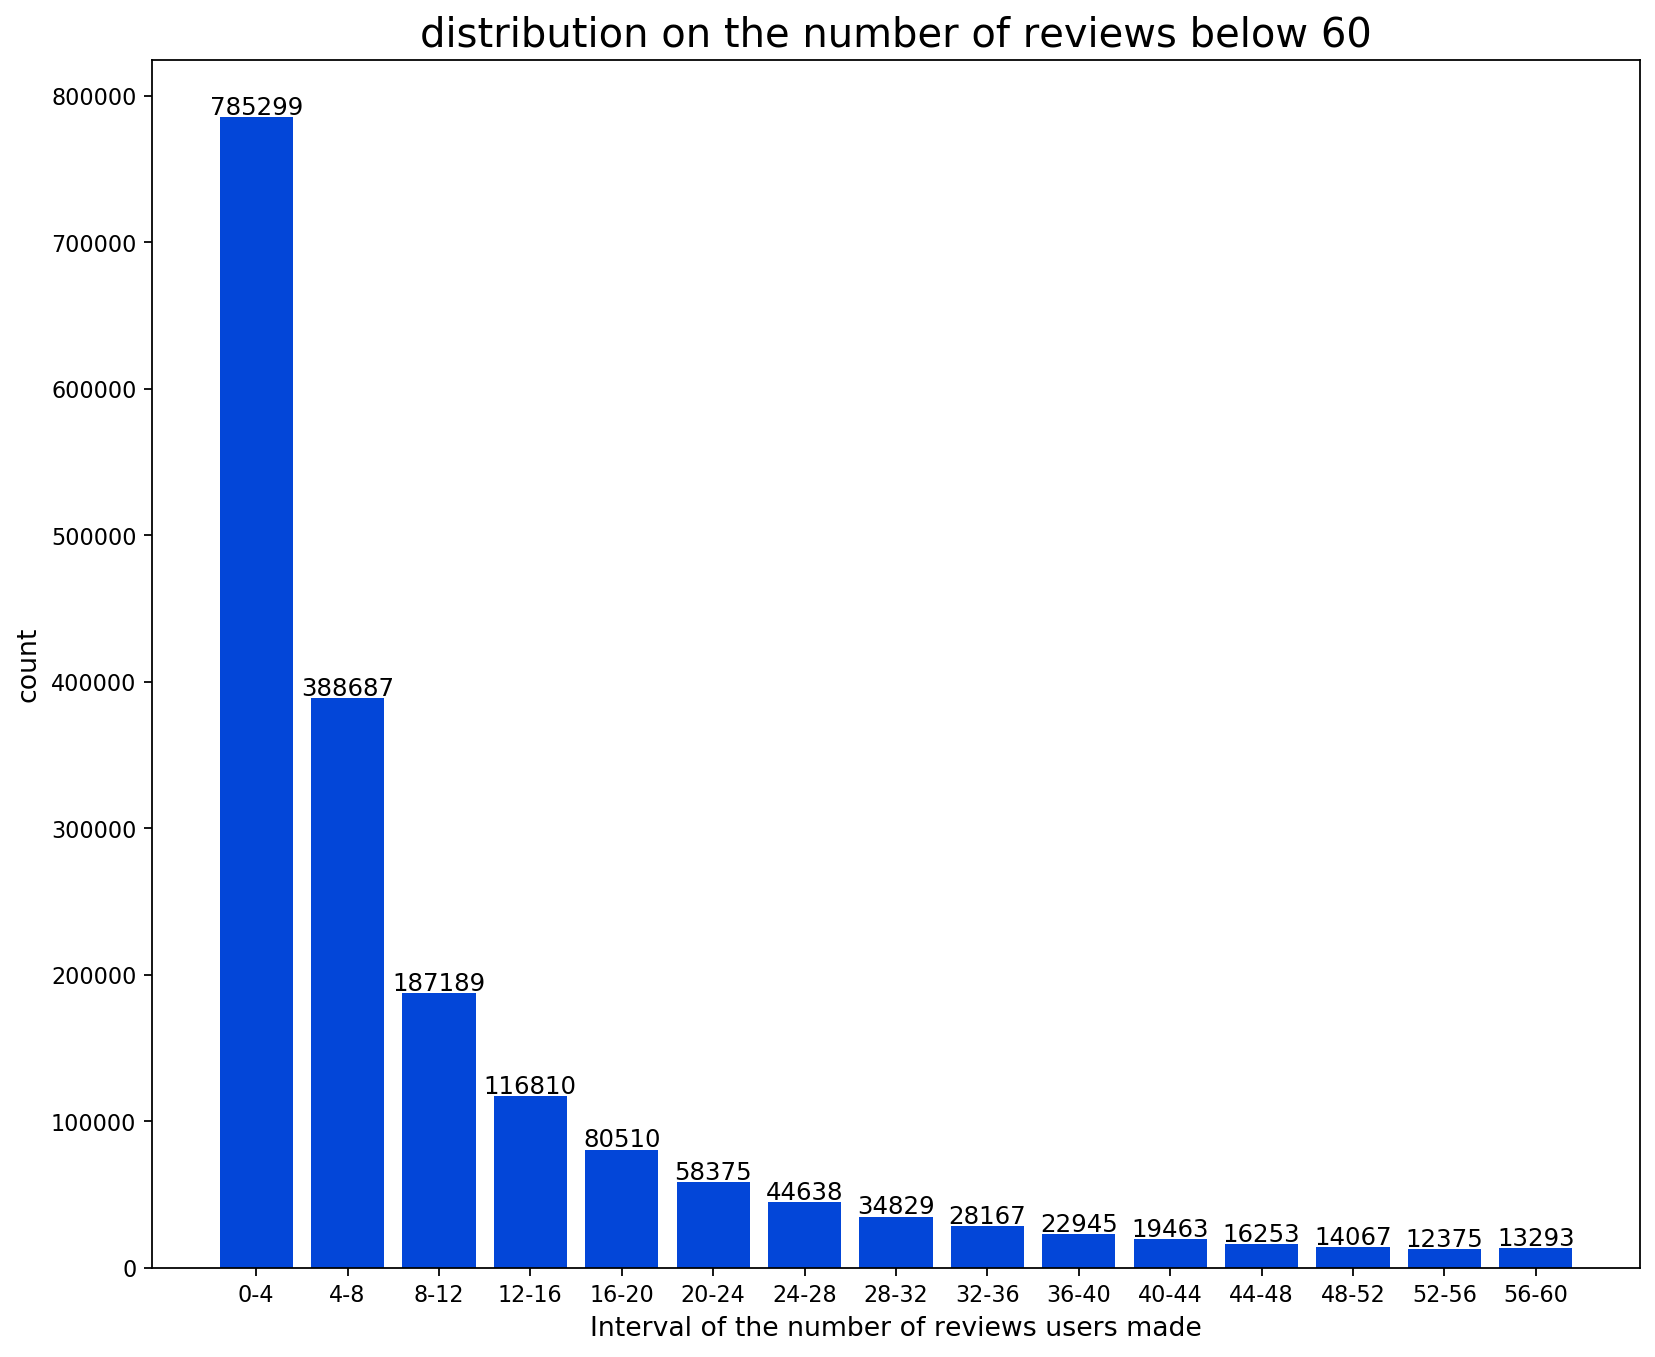

In [17]:
cbp.create_bar_plots(review_cnt,xaxes,0,60,title,xlabel,ylabel)

#### number of friends data visualization

In [28]:
title = 'percentage of users that have only one friend VS percentage of users that have more than one friend'
labels = ['users that have only one friend','users that have more than one friend']
sizes = [952382, 1968703-952382]

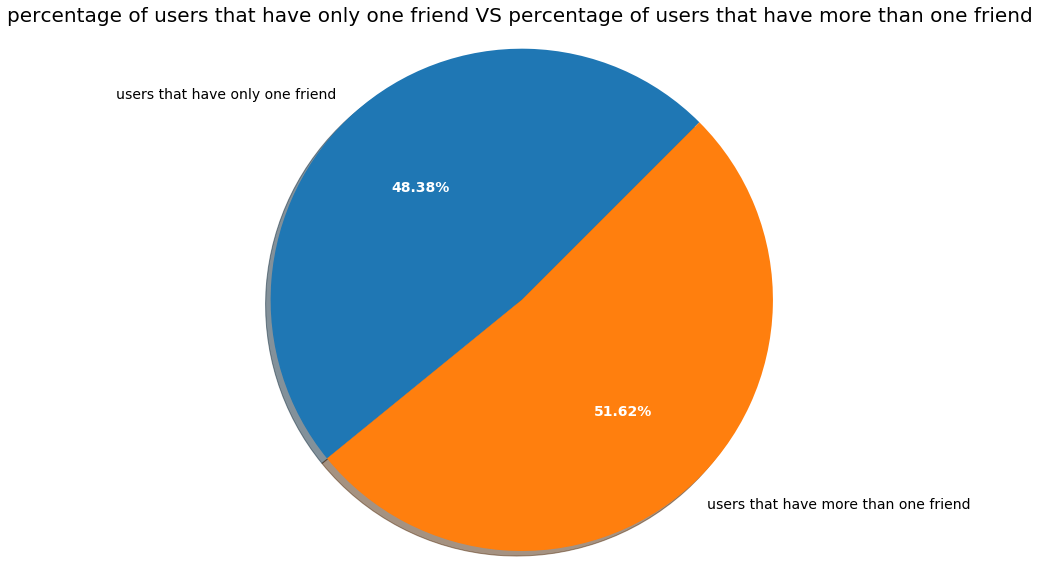

In [29]:
cfpc.create_friends_pie_chart(sizes, labels, title)

In [30]:
labels = ['less than 10 reviews','10-20 reviews','20-30 reviews','30-40 reviews','40-50 reviews','more than 50 reviews']

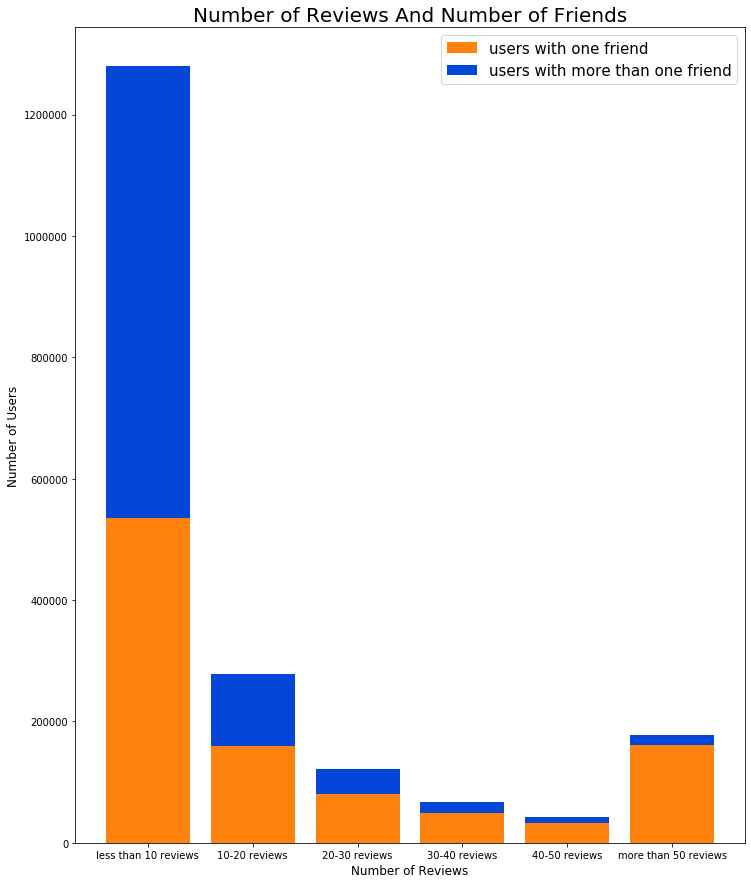

In [31]:
csp.plot_stacked_plot(review_cnt,num_friend,labels)

# Review Exploration
## Wordclouds
(Expect extremely long computation time (> 2 hours) due to the immense total size of the review texts)

In [ ]:
for i in range(1, 2):
    generate_wordcloud(business, review, i, 100)
    print("Word cloud for " + str(i) + " star businesses completed")

## Sentiment Analysis
(Expect very long computation time due to the immense total size of the review texts)

## Number of New Reviews vs. Year

In [ ]:
ctw.review_time(review)

## Ratings of Businesses w/ Certain Attributes

In [ ]:
ctw.contribute(business)